In [1]:
import os
import tensorflow as tf
#tf.enable_eager_execution()

In [2]:
dataset_tfrecords = tf.data.TFRecordDataset('../data/kmnist_train.tfrecord')

In [3]:
for element in dataset_tfrecords.take(1):
    print(element)

tf.Tensor(b'\n\xc6\x06\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x03\n\xb3\x06\n\timage_raw\x12\xa5\x06\n\xa2\x06\n\x9f\x06\x08\x04\x12\x08\x12\x02\x08\x1c\x12\x02\x08\x1c"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\xad\xfc\xf6w\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x13\x9b\xff\xf2J\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x9a\xff\xe14\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00l\xed\xf9]\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1d\xd0\xfdk\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01N\xc8\xe9\x9d\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1d\xe5\xfd\x92\x05\x00\x00\x00\x00\x07\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1d\xc7\xc5\xba\x0c\x00\x00\x00\x

In [9]:
def parse_features(kmnist_ds):
 def _transform_img(img_dict):
     image = tf.io.parse_tensor(img_dict["image_raw"], tf.uint8)
     return dict(
         image = tf.reshape(image, [28, 28]) ,
         label = img_dict["label"]
     )


In [10]:
def _parse_function(example_proto):
  # Parse the input tf.Example proto using the dictionary below.
    feature_description = {
        'label': tf.io.FixedLenFeature([], tf.int64, default_value=0),
        'image_raw': tf.io.FixedLenFeature([], tf.string, default_value=''),
    }
    return tf.io.parse_single_example(example_proto, feature_description)

In [11]:
dataset_intermedio = dataset_tfrecords.map(_parse_function)

In [12]:
for elem in dataset_intermedio.take(1):
    print(elem)

{'image_raw': <tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x04\x12\x08\x12\x02\x08\x1c\x12\x02\x08\x1c"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\xad\xfc\xf6w\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x13\x9b\xff\xf2J\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x9a\xff\xe14\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00l\xed\xf9]\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1d\xd0\xfdk\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01N\xc8\xe9\x9d\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1d\xe5\xfd\x92\x05\x00\x00\x00\x00\x07\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1d\xc7\xc5\xba\x0c\x00\x00\x00\x00 \xd6\xd44\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [13]:
def _transform_img(img_dict):
 image = tf.io.parse_tensor(img_dict["image_raw"], tf.uint8)
 return dict(
     image = tf.reshape(image, [28, 28]) ,
     label = img_dict["label"]
 )

In [14]:
dataset_final = dataset_intermedio.map(_transform_img)

In [15]:
for ele in dataset_final.take(1):
    print(ele)

{'image': <tf.Tensor: shape=(28, 28), dtype=uint8, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2, 173, 252, 246, 119,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19,
        155, 255, 242,  74,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 154,
        255, 225,  52,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 108, 237,
        249,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 208, 253,
        107,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  78, 200, 233, 157,
          4,   0,   0,   0,   0,   0,   0,  

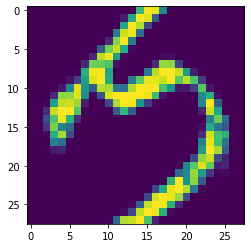

In [16]:
import matplotlib.pyplot as plt
for elem in dataset_final.take(1):
    plt.imshow(elem['image'])

In [17]:
def parse_tfrecords(tensor_string):
    feature_description = {
        'label': tf.io.FixedLenFeature([], tf.int64, default_value=0),
        'image_raw': tf.io.FixedLenFeature([], tf.string, default_value=''),
    }
    img_dic = tf.io.parse_single_example(tensor_string, feature_description)
    
    img_bytes = tf.io.parse_tensor(img_dic["image_raw"], tf.uint8)
    label = img_dic['label']
    image = tf.reshape(img_bytes, [28, 28])
    return {'image': image, 'label':label}

In [18]:
kminst_train_ds = tf.data.TFRecordDataset('../data/kmnist_train.tfrecord')
train_ds = kminst_train_ds.map(parse_tfrecords)

In [19]:
train_ds

<MapDataset shapes: {image: (28, 28), label: ()}, types: {image: tf.uint8, label: tf.int64}>

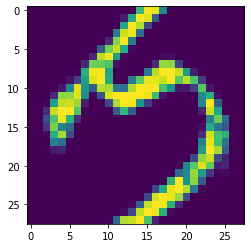

In [20]:
for ele in train_ds.take(1):
    plt.imshow(ele['image'])